# Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    A single cell estimate of the population 16+ for each state.

    Controls for Hispanic Origin by age and sex.

    Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
census_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
census_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Understanding Data

In [3]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# check for null values
census_data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
# checking the description
census_data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# checking for duplicates
census_data.duplicated().sum()

24

In [7]:
# removing Duplicates
census_data = census_data[~census_data.duplicated()]

In [8]:
# unique values in Education column
census_data.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
# unique value in Education _num
census_data.Education_num.unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

### Ordinal values in Education_num Column

### Understanding WorkClass Column

In [10]:
census_data.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### ? is present as the unique value

we need to manipulate the Data

In [11]:
census_data.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
census_data.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [13]:
census_data.Marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

## Data Manipulation

In [14]:
# discard white spaces from entries
census_data.columns= census_data.columns.str.strip()

In [15]:
# discard spaces from entries
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for col in columns:
    census_data[col] = census_data[col].str.strip()

In [16]:
# changing "?" to Not_known
columns = ['Workclass', 'Occupation', 'Native_country']
for col in columns:
  a=census_data[census_data[col]=='?'].index
  for i in a:
    census_data[col][i]='Not_known'

In [17]:
# after changing "?"
census_data.Workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Not_known            1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [18]:
census_data.Occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3767
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Not_known            1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: Occupation, dtype: int64

In [19]:
census_data.Native_country.value_counts()

United-States                 29152
Mexico                          639
Not_known                       582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

# EDA

### Univariate

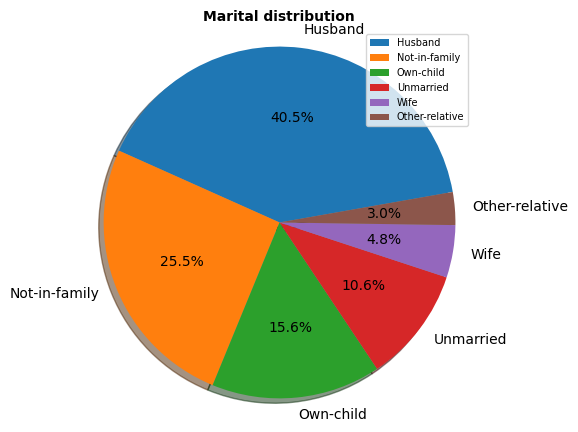

In [20]:
# Creating a pie chart for 'Relationship'
Relationship = census_data['Relationship'].value_counts()

plt.style.use('default')
plt.figure(figsize=(5,5))
plt.pie(Relationship.values, labels=Relationship.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

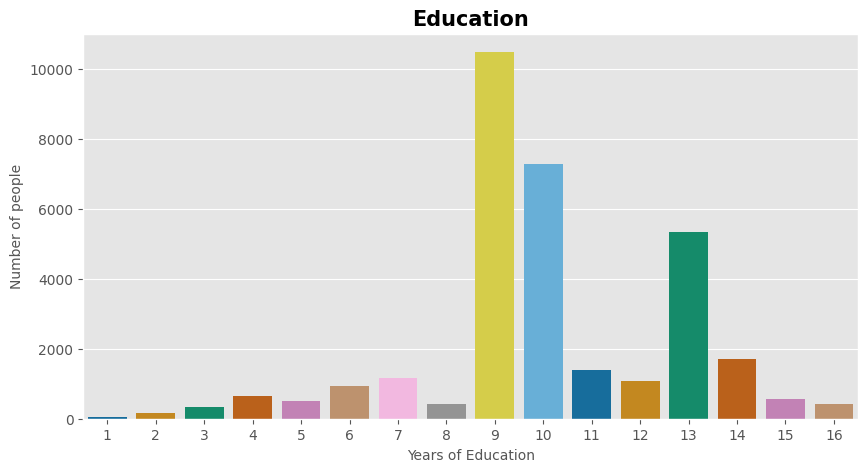

In [21]:
# Creating a barplot for 'Education'
education = census_data['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(education.index, education.values, palette='colorblind')
plt.title('Education', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={'fontsize': 10})
plt.ylabel('Number of people', fontdict={ 'fontsize': 10})
plt.tick_params(labelsize=10)
plt.show()

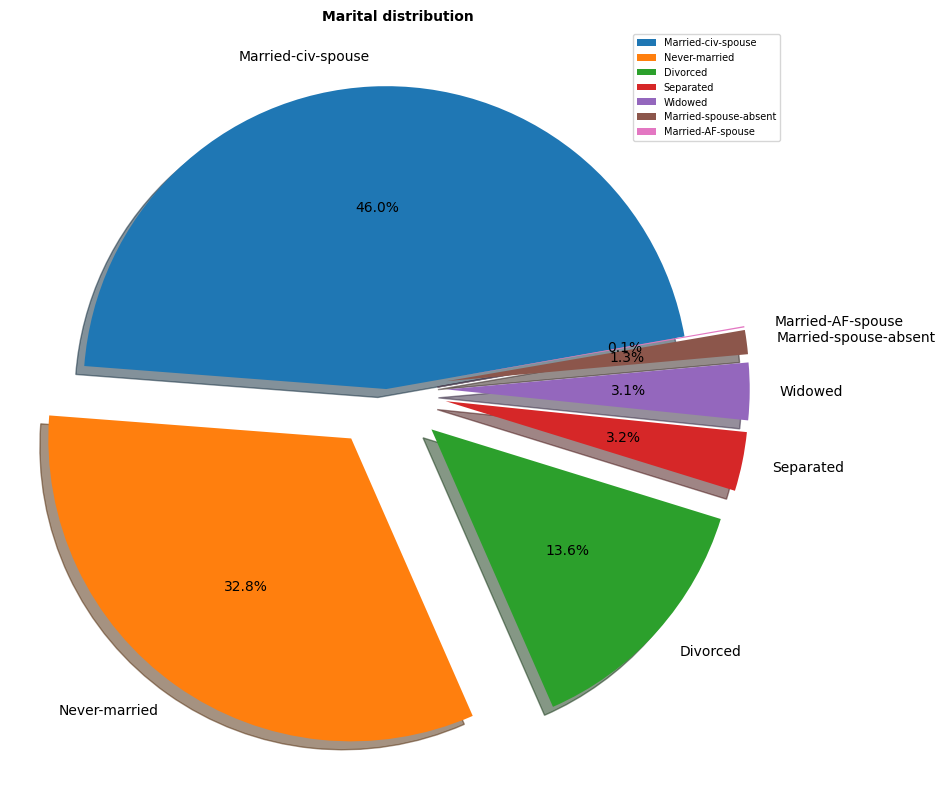

In [22]:
# Creating a pie chart for 'Marital_status'
marital = census_data['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10,10))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

### Bivariate analysis

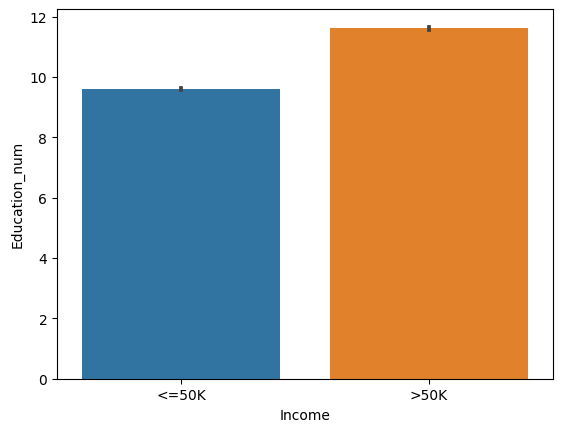

In [23]:
## Income V/s Education
sns.barplot(x=census_data.Income , y=census_data.Education_num)

### people with higher Education tends to have more salary

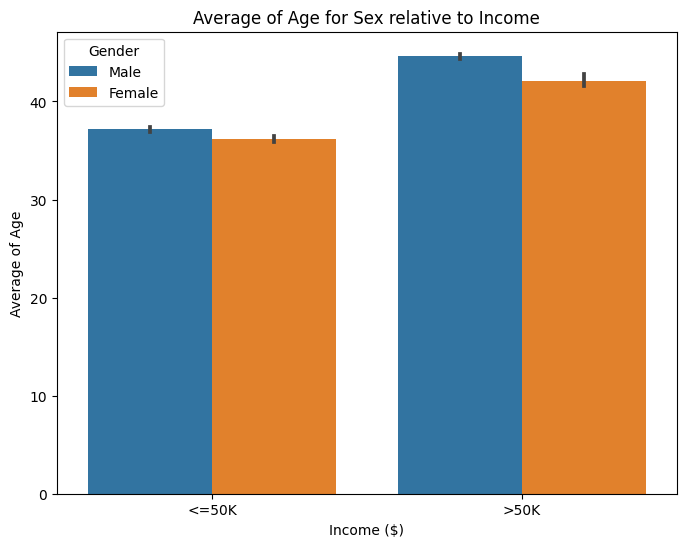

In [24]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sns.barplot(data = census_data, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend( title = 'Gender')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

### Gender doesn't affect income but it seems Age(experience) do

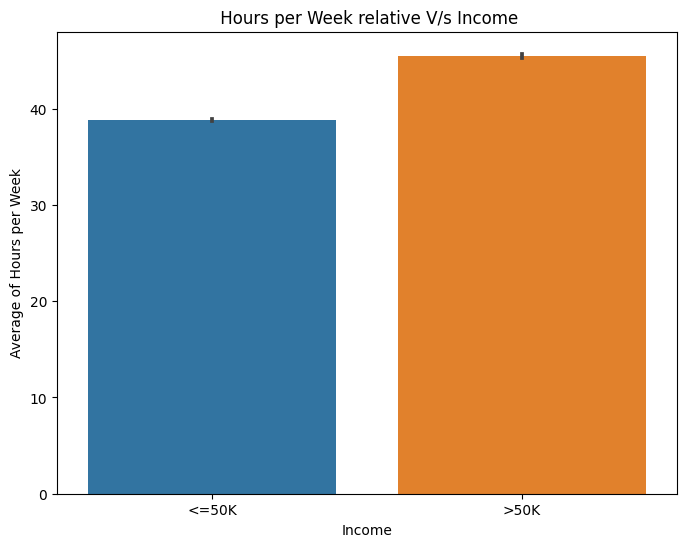

In [25]:
# Bar Chart 
plt.figure(figsize=[8,6])
sns.barplot(census_data.Income,census_data.Hours_per_week)
plt.title(' Hours per Week relative V/s Income')
plt.xlabel('Income')
plt.ylabel('Average of Hours per Week');

### Hours also impact the Income

### Multivariate analysis

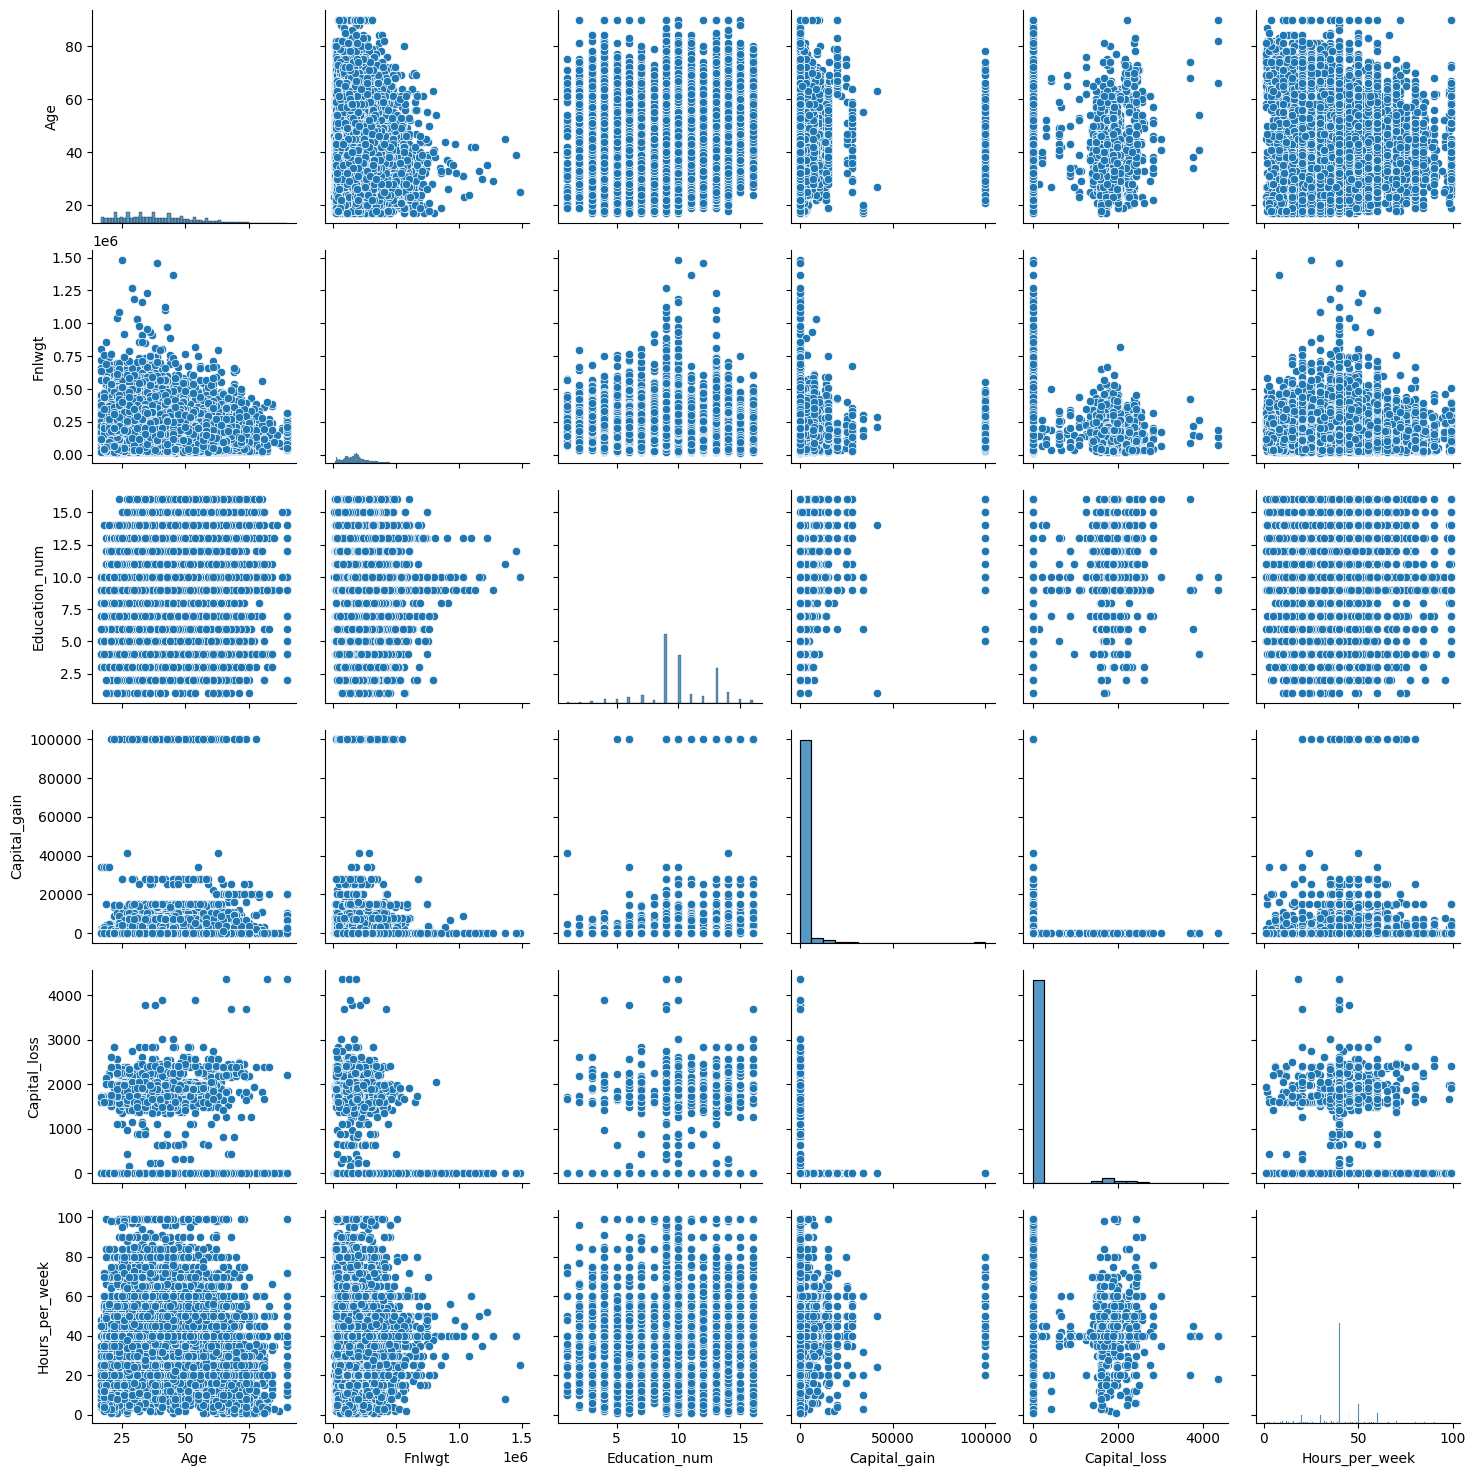

In [26]:
# Creating a pairplot of dataset
sns.pairplot(census_data)
plt.show()

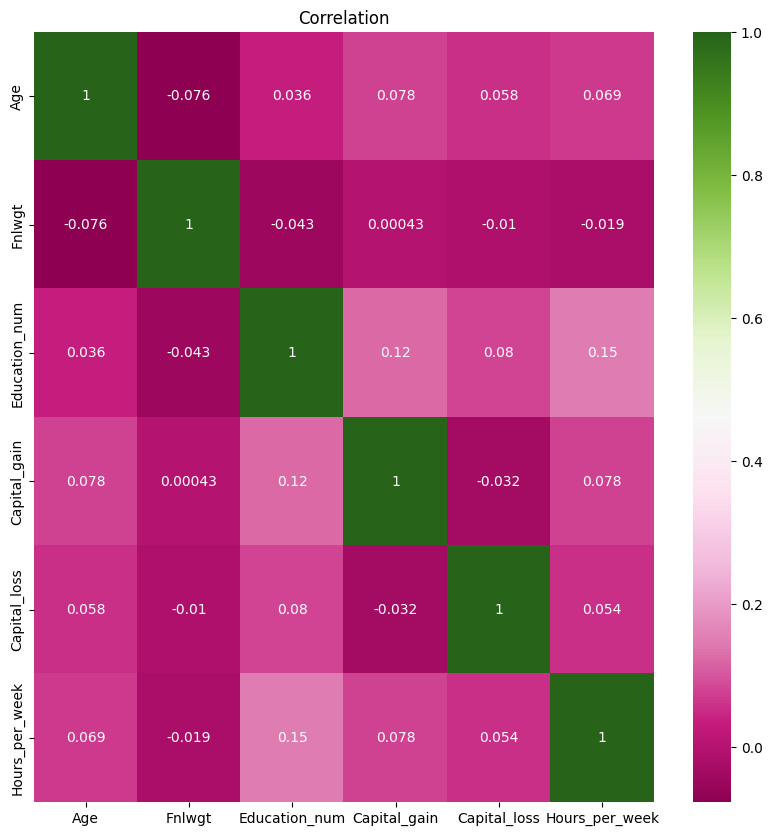

In [27]:
#heat map
plt.figure(figsize = [10,10])
sns.heatmap(census_data.corr(),cmap="PiYG", annot = True)
plt.title('Correlation')
plt.show()

# Data Preprocessing

In [28]:
## label Encoding to all object column
from sklearn.preprocessing import LabelEncoder

for column in census_data.columns:
    if census_data[column].dtypes == 'object':
        encoder = LabelEncoder()
        census_data[column] = encoder.fit_transform(census_data[column])

In [29]:
census_data.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,3,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,5,1,4,1,0,0,40,39,0


# Feature Selection

In [30]:
features = census_data.drop('Income', axis=1)
target = census_data['Income']

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)
clf.fit(features, target)
feat_import = pd.DataFrame(zip(features.columns.tolist(), clf.feature_importances_ * 100), columns=['Feature', 'Importance'])
feat_import

,Feature,Importance
0,Age,15.533195
1,Workclass,4.297734
2,Fnlwgt,16.461806
3,Education,3.681655
4,Education_num,8.756453
5,Marital_status,7.058842
6,Occupation,7.503383
7,Relationship,9.347001
8,Race,1.497604
9,Sex,2.979336


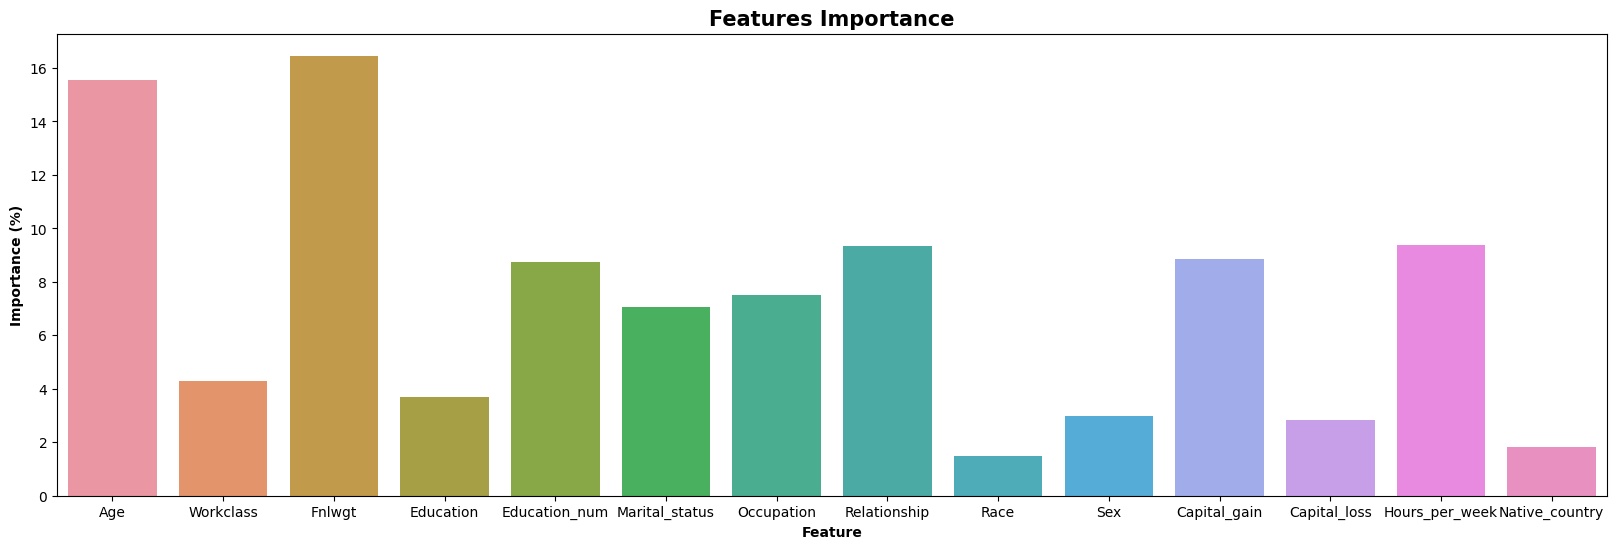

In [32]:
# Features importance plot
plt.figure(figsize=[20,6])
sns.barplot(data=feat_import, x='Feature', y='Importance')
plt.title('Features Importance', weight='bold', fontsize=15)
plt.xlabel('Feature', weight='bold', fontsize=10)
plt.ylabel('Importance (%)', weight='bold', fontsize=10);

# Will drop any Feature that has less than 5% of importance

In [33]:
### will drop the coumn as they have negligble impact on the prediction
features.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1, inplace=True)

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
for col in features.columns:
    SC = StandardScaler()
    features[col] = SC.fit_transform(features[col].values.reshape(-1, 1))

In [35]:
# Checking for Imbalace in the data
round(target.value_counts(normalize=True) * 100, 2)

0    75.91
1    24.09
Name: Income, dtype: float64

In [36]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
ROS.fit(features, target)
features_resampled, target_resampled = ROS.fit_resample(features,target)
round(target_resampled.value_counts(normalize=True) * 100, 2)

0    50.0
1    50.0
Name: Income, dtype: float64

In [37]:
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score


In [38]:
# model building and evaluation

def Model_Building(Features,target,model):
  Maximum_Accuracy=0

  test_size=[0.2,0.25,0.3]
  for j in test_size:
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                            random_state=i)
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=accuracy_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=accuracy_score(y_train,check)
            
        if acc>Maximum_Accuracy:
          Maximum_Accuracy=acc
          print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

# Logistic Regression

In [39]:
Model_Building(features_resampled, target_resampled,LogisticRegression(solver="liblinear", random_state=1))

Test set accuracy 0.7538212369673044 Train set accuracy 0.7554093382259901 Random state 0 test_size 0.2
Test set accuracy 0.754529810709586 Train set accuracy 0.7547513602429458 Random state 1 test_size 0.2
Test set accuracy 0.7566555319364308 Train set accuracy 0.7544476780969253 Random state 2 test_size 0.2
Test set accuracy 0.7614130984917502 Train set accuracy 0.7530558015943313 Random state 3 test_size 0.2
Test set accuracy 0.7645510679218545 Train set accuracy 0.751866379855751 Random state 9 test_size 0.2
Test set accuracy 0.7657657657657657 Train set accuracy 0.7513096292547135 Random state 43 test_size 0.2


### accuracy score 76%

# KNN Regression

In [40]:
Model_Building(features_resampled, target_resampled,KNeighborsClassifier())

Test set accuracy 0.8374329385565341 Train set accuracy 0.8872326964443882 Random state 0 test_size 0.2
Test set accuracy 0.8434052029557647 Train set accuracy 0.8865747184613438 Random state 6 test_size 0.2
Test set accuracy 0.8456321490029355 Train set accuracy 0.8863722636973301 Random state 63 test_size 0.2


### accuracy score 84 %

# Naive Bayes Classifier

In [41]:
Model_Building(features_resampled, target_resampled,GaussianNB())

Test set accuracy 0.6525964166413605 Train set accuracy 0.6468176641781602 Random state 0 test_size 0.2
Test set accuracy 0.6576576576576577 Train set accuracy 0.6575477666708844 Random state 3 test_size 0.2
Test set accuracy 0.6646421702601478 Train set accuracy 0.6609135771226117 Random state 4 test_size 0.2
Test set accuracy 0.6665654418463407 Train set accuracy 0.6579020625079084 Random state 22 test_size 0.2
Test set accuracy 0.6704119850187266 Train set accuracy 0.6559534354042769 Random state 26 test_size 0.2


### accuracy_score 65 %

# Random Forest Classifier

In [42]:
Model_Building(features_resampled, target_resampled,RandomForestClassifier(random_state=42))

Test set accuracy 0.9264095556230387 Train set accuracy 0.9999746931544983 Random state 0 test_size 0.2
Test set accuracy 0.9283328272092317 Train set accuracy 0.9998987726179932 Random state 1 test_size 0.2
Test set accuracy 0.9321793703816176 Train set accuracy 0.9999240794634949 Random state 6 test_size 0.2
Test set accuracy 0.9326854944832473 Train set accuracy 0.9998734657724915 Random state 37 test_size 0.2
Test set accuracy 0.9335965178661808 Train set accuracy 0.9998987726179932 Random state 57 test_size 0.2


### accuracy score 93 %

# Decision Tree Classifier

In [43]:
Model_Building(features_resampled, target_resampled,DecisionTreeClassifier(random_state=42))

Test set accuracy 0.9107197084725175 Train set accuracy 0.9999746931544983 Random state 0 test_size 0.2
Test set accuracy 0.9149711509262071 Train set accuracy 0.9999240794634949 Random state 1 test_size 0.2
Test set accuracy 0.9171980969733778 Train set accuracy 0.9999493863089965 Random state 2 test_size 0.2
Test set accuracy 0.9176029962546817 Train set accuracy 0.9999240794634949 Random state 6 test_size 0.2
Test set accuracy 0.918918918918919 Train set accuracy 0.9999240794634949 Random state 37 test_size 0.2
Test set accuracy 0.9197287174815265 Train set accuracy 0.9999493863089965 Random state 61 test_size 0.2


### accuracy score 91%

# ADA Boost Clasifier

In [44]:
Model_Building(features_resampled, target_resampled,AdaBoostClassifier())

Test set accuracy 0.8255896345783986 Train set accuracy 0.8255346071112236 Random state 0 test_size 0.2
Test set accuracy 0.8287276040085029 Train set accuracy 0.8245476401366569 Random state 2 test_size 0.2
Test set accuracy 0.8299423018524142 Train set accuracy 0.8240415032266228 Random state 6 test_size 0.2
Test set accuracy 0.8329790464621926 Train set accuracy 0.8231557636340631 Random state 39 test_size 0.2
Test set accuracy 0.8341937443061038 Train set accuracy 0.8248766291281792 Random state 75 test_size 0.2


### accuracy score 83 %

# Support Vector Classifier

In [45]:
def Model_Build(Features,target,model):
  Maximum_Accuracy=0

  test_size=[0.2,0.25,0.3]
  for j in test_size:
    x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                            random_state=42)
    model.fit(x_train,y_train)
    pred= model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    check=model.predict(x_train)
    check_acc=accuracy_score(y_train,check)
            
    if acc>Maximum_Accuracy:
      Maximum_Accuracy=acc
      print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

Model_Build(features_resampled, target_resampled,SVC())

Test set accuracy 0.8114181597327664 Train set accuracy 0.8225737061875237 Random state 32524 test_size 0.2
Test set accuracy 0.8148028180419468 Train set accuracy 0.8220272641382103 Random state 32524 test_size 0.25
Test set accuracy 0.8169242189081585 Train set accuracy 0.8213159797541576 Random state 32524 test_size 0.3


# accuracy score 81 %

In [46]:
Model_Building(features_resampled, target_resampled,KNeighborsClassifier())

Test set accuracy 0.8374329385565341 Train set accuracy 0.8872326964443882 Random state 0 test_size 0.2
Test set accuracy 0.8434052029557647 Train set accuracy 0.8865747184613438 Random state 6 test_size 0.2
Test set accuracy 0.8456321490029355 Train set accuracy 0.8863722636973301 Random state 63 test_size 0.2


# accuracy score 84 %

# Hyper Parameter Tuning  
## Random Forest Classifier

In [47]:
%%time

x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=57)
rf = RandomForestClassifier(random_state=5)

estimators = [int(x) for x in np.linspace(start=50, stop=150, num=20)]
depth = [int(x) for x in np.linspace(start=50, stop=150, num=20)]
param_grid = {    'n_estimators': estimators,
                  'max_depth': depth
              }

grid_rf = GridSearchCV(rf,
                        param_grid=param_grid,
                        scoring="accuracy",
                        cv=5)

grid_fit = grid_rf.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_


print("best estimator: " + str(grid_rf.best_estimator_))
print("best params: " + str(grid_rf.best_params_))
print("best score:", grid_rf.best_score_)

best estimator: RandomForestClassifier(max_depth=50, n_estimators=86, random_state=5)
best params: {'max_depth': 50, 'n_estimators': 86}
best score: 0.9091990383398709
CPU times: user 1h 47min 20s, sys: 17.7 s, total: 1h 47min 38s
Wall time: 1h 47min 24s


In [48]:
# make predictions

pred_rf = grid_rf.predict(x_test)

# calculate accuracy score
logit_accuracy = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest Classifier: {:.2f}%'.format(logit_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_rf)
print(report)

Accuracy of Random Forest Classifier: 93.49%
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4914
           1       0.90      0.98      0.94      4965

    accuracy                           0.93      9879
   macro avg       0.94      0.93      0.93      9879
weighted avg       0.94      0.93      0.93      9879



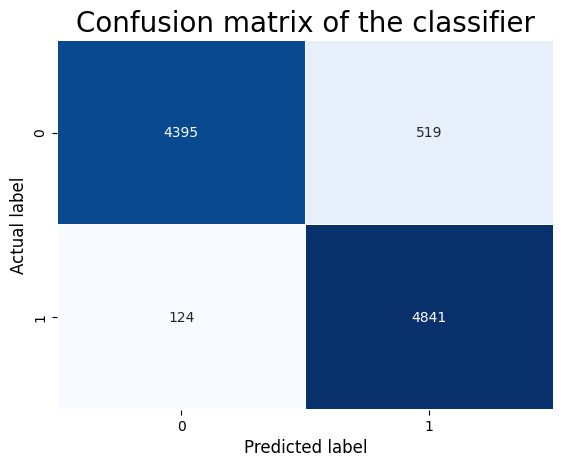

In [49]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

In [50]:
y_pred_prob = grid_rf.predict_proba(x_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)

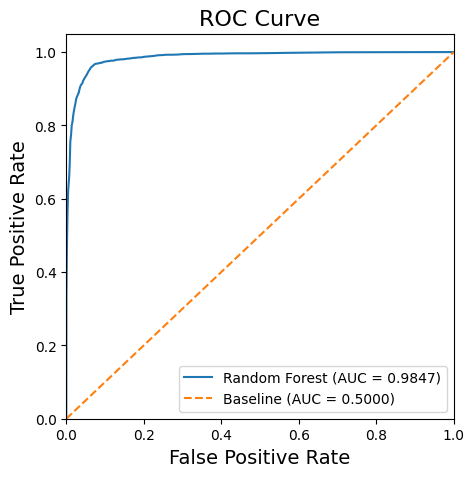

In [51]:
# create ROC curves

from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_rf.predict_proba(x_test)[:,1])
plt.figure(figsize=(5, 5))

# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:1.4f})".format(rf_roc_auc))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [52]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("Census_Income_Case_Study.pkl","wb") # name of my pickle file , wb -write
pickle.dump(grid_rf, pickle_out)
pickle_out.close()

In [54]:
# loading the pickeled model
pickle_in = open("Census_Income_Case_Study.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)

In [55]:
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,9869,9870,9871,9872,9873,9874,9875,9876,9877,9878
Predicted,1,0,1,1,1,0,0,1,1,1,...,1,0,1,1,0,1,0,1,0,0
Original,1,0,1,1,1,0,0,1,1,0,...,1,0,1,1,0,1,0,1,0,0


Case Study Completed